In [339]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.pool import QueuePool
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option("display.max_columns", 100)

In [2]:
db_uri = ""
engine = create_engine(db_uri, poolclass=QueuePool, pool_size=10, max_overflow=20)

In [234]:
query = f"""
select *
from backtesting_output
"""

In [235]:
with engine.connect() as connection:
    df = pd.read_sql(query, connection)

In [236]:
df.shape

(380, 37)

In [237]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(380, 37)
(378, 37)


In [348]:
# companies we invested in less than 3 years ago and no return has been realized should not count
# because we do not have all the period to assess
print(df.shape)
newest_possible_date = (datetime.today() -pd.DateOffset(days=3*365))
df = df[~((df["min_price_date"] > newest_possible_date) & (pd.isna(df["doubling_return_delay"])))]
print(df.shape)

(328, 37)
(248, 37)


In [349]:
df

,ticker,ref_report_date,report_date,ref_report_date_quarter,report_date_quarter,outs_shares1,outs_shares2,outs_shares3,outs_shares4,outs_shares5,outs_shares6,outs_shares7,outs_shares8,outs_shares9,outs_shares10,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y,min_price_date,min_price,max_price_date,max_price,ncavps,liqvps,ncav_mos,liqv_mos,highest_return_delay,doubling_price,doubling_date,doubling_return_delay,highest_return,min_price_modif,max_price_modif,ncav_mos_modif,liqv_mos_modif,doubling_price_modif,highest_return_modif,ticker_type
16,ABSI,2020-12-31,2023-03-30,Q4,Q4,91321166.0,89768980.0,90375022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.04,-1.04,2023-05-01,1.165,2023-07-21,2.450,1.535997,0.684430,24.15,-70.21,0.22,2.330,2023-07-25,0.23,110.30,1.3980,1.960,8.98,-104.26,2.7960,40.20,listed
17,ACNT,1999-09-30,2008-09-30,Q3,Q3,6296555.0,6347252.0,6243028.0,6164620.0,6176874.0,6021351.0,5964304.0,5965156.0,6120541.0,6153846.0,-4.36,2.83,2008-11-24,3.520,2011-02-17,15.500,5.907388,3.585442,40.41,1.83,2.23,7.040,2009-05-22,0.49,340.34,4.2240,12.400,28.50,-17.81,8.4480,193.56,listed
20,ACU,1998-11-13,2008-10-29,Q3,Q3,3650000.0,3728571.0,3712121.0,3840000.0,3842000.0,3586000.0,3563000.0,3604000.0,3798000.0,3377000.0,-3.91,0.70,2008-12-08,5.330,2010-04-12,13.040,5.760000,2.843107,7.47,-87.47,1.34,10.660,2010-05-18,1.44,144.65,6.3960,10.432,-11.04,-124.97,12.7920,63.10,listed
21,ADD,2006-12-31,2015-12-31,Q2,Q2,54519.0,49026.0,37171.0,37165.0,37163.0,37921.0,33240.0,29625.0,0.0,0.0,-86.50,-103.95,2016-02-17,55.600,2018-06-22,408.000,462.150241,-739.399167,87.97,107.52,2.35,111.200,2018-10-31,2.70,633.81,66.7200,326.400,85.56,109.02,133.4400,389.21,listed
23,ADXS,2015-06-15,2023-05-23,Q1,Q1,4405286.0,1820480.0,12888340.0,12113278.0,8580349.0,41554.0,33580.0,28442.0,22213.0,NaN,-95.39,-132.60,2023-05-03,0.650,2023-07-24,1.950,1.575607,1.632048,58.75,60.17,0.22,1.300,2023-08-02,0.25,200.00,0.7800,1.560,50.50,52.21,1.5600,100.00,listed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,XOS,2020-11-20,2022-11-10,Q3,Q3,174118000.0,115932000.0,162184621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.61,-7.61,2022-12-30,0.430,2023-01-12,1.190,0.581548,0.044999,26.06,-855.58,0.04,0.860,2023-02-14,0.13,176.74,0.5160,0.952,11.27,-1046.69,1.0320,84.50,listed
375,XPL,2005-11-14,2015-11-12,Q3,Q3,39314000.0,39248000.0,36463000.0,34466000.0,34163000.0,29750000.0,29750000.0,30049000.0,29607000.0,28557000.0,-30.61,-5.02,2015-09-30,0.402,2016-08-09,0.950,0.459429,0.453796,12.50,11.41,0.86,0.804,2016-09-07,0.94,136.32,0.4824,0.760,-5.00,-6.30,0.9648,57.55,listed
376,XPON,2021-09-30,2022-11-10,Q3,Q3,6802464.0,6445000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.25,-5.25,2022-12-21,0.900,2023-03-14,7.150,1.273682,1.326735,29.34,32.16,0.23,1.800,2023-01-05,0.04,694.44,1.0800,5.720,15.21,18.60,2.1600,429.63,listed
377,Y,2009-08-06,2018-08-02,Q2,Q2,15180075.0,15419034.0,15438859.0,16003023.0,16442566.0,16781461.0,16950337.0,8921972.0,9223679.0,9103708.0,-39.90,-54.92,2018-07-02,570.405,2020-02-19,847.945,75610.133810,-917.218310,99.25,162.19,1.64,1140.810,NaT,NaN,48.66,684.4860,678.356,99.09,174.63,1368.9720,-0.90,listed


In [350]:
df.describe()

,ref_report_date,report_date,outs_shares1,outs_shares2,outs_shares3,outs_shares4,outs_shares5,outs_shares6,outs_shares7,outs_shares8,outs_shares9,outs_shares10,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y,min_price_date,min_price,max_price_date,max_price,ncavps,liqvps,ncav_mos,liqv_mos,highest_return_delay,doubling_price,doubling_date,doubling_return_delay,highest_return,min_price_modif,max_price_modif,ncav_mos_modif,liqv_mos_modif,doubling_price_modif,highest_return_modif
count,248,248,2.480000e+02,2.470000e+02,2.370000e+02,2.120000e+02,2.030000e+02,1.970000e+02,1.930000e+02,1.890000e+02,1.860000e+02,1.740000e+02,248.000000,247.000000,248,248.000000,248,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,222,222.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,2008-03-04 19:38:42.580645120,2016-02-04 15:34:50.322580736,5.109630e+07,7.923181e+08,5.707518e+08,5.437607e+07,1.233372e+08,1.028792e+08,7.719221e+07,3.433849e+07,1.075254e+08,1.614791e+07,-59.153226,111.828219,2016-03-03 17:48:23.225806336,13.226976,2017-05-29 20:54:11.612903168,93.775354,392.165439,16.834077,35.507621,32.485887,1.238750,26.453952,2017-06-29 11:08:06.486486528,1.039685,2749.416613,15.872371,75.020283,22.608992,18.982782,31.744742,1799.611008
min,1991-05-31 00:00:00,2000-05-31 00:00:00,1.018000e+03,-1.000000e-01,0.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3218.820000,-1002.770000,2000-05-31 00:00:00,0.000100,2003-05-15 00:00:00,0.022000,0.001034,-917.218310,0.240000,-2636.050000,0.000000,0.000200,2003-01-07 00:00:00,0.000000,11.900000,0.000120,0.017600,-19.710000,-3183.260000,0.000240,-25.400000
25%,1999-08-12 18:00:00,2009-02-08 18:00:00,4.246278e+06,3.456760e+06,3.465533e+06,2.667602e+06,2.041366e+06,2.019091e+06,1.458424e+06,1.533500e+06,1.225392e+06,1.109072e+06,-83.670000,-50.675000,2009-03-06 00:00:00,0.719980,2011-04-30 12:00:00,3.437500,1.312766,0.501614,11.240000,-29.907500,0.270000,1.439960,2011-04-11 06:00:00,0.250000,141.477500,0.863976,2.750000,-6.512500,-55.890000,1.727952,60.985000
50%,2008-12-07 12:00:00,2018-05-15 00:00:00,9.514780e+06,9.520000e+06,9.121000e+06,8.819190e+06,7.836000e+06,6.802721e+06,7.237000e+06,6.799444e+06,6.757414e+06,6.111813e+06,-30.000000,-17.210000,2018-06-25 00:00:00,2.000000,2020-04-10 12:00:00,7.405000,3.047248,1.762369,29.045000,10.435000,0.905000,4.000000,2020-09-11 00:00:00,0.730000,243.345000,2.400000,5.924000,14.855000,-7.480000,4.800000,128.895000
75%,2013-12-05 00:00:00,2022-11-09 06:00:00,2.545444e+07,2.732485e+07,2.224488e+07,2.052288e+07,1.828612e+07,1.595460e+07,1.565729e+07,1.425985e+07,1.432870e+07,1.383169e+07,-3.432500,-0.985000,2022-11-29 18:00:00,4.420000,2023-02-14 06:00:00,15.750000,7.702373,5.146815,56.310000,61.520000,2.222500,8.840000,2023-05-08 18:00:00,1.745000,529.705000,5.304000,12.600000,47.570000,53.820000,10.608000,319.802500
max,2022-03-31 00:00:00,2023-08-18 00:00:00,3.464167e+09,1.778657e+11,1.219412e+11,3.800000e+09,1.714782e+10,1.291765e+10,8.176262e+09,3.705882e+09,1.383077e+10,7.973491e+08,1663.640000,32789.930000,2023-10-24 00:00:00,777.600000,2023-11-01 00:00:00,10625.000000,75610.133810,1510.308628,99.780000,2505.420000,3.000000,1555.200000,2023-10-25 00:00:00,3.000000,396300.000000,933.120000,8500.000000,99.730000,2986.500000,1866.240000,264166.670000
std,NaN,NaN,2.467199e+08,1.132074e+10,7.922605e+09,3.401494e+08,1.230795e+09,9.562935e+08,6.476405e+08,2.711289e+08,1.050640e+09,6.247970e+07,289.986533,2092.839026,NaN,73.473528,NaN,726.601320,4871.100140,155.904267,28.150070,358.587877,1.012527,146.947056,NaN,0.923616,26176.669394,88.168234,581.281056,33.780569,430.305329,176.336468,17451.113068


### Get rid of lines having a noisy ncav and liqv

In [351]:
print(df.shape)
df = df[(df["ncavps"] != -np.Inf) & (~pd.isna(df["ncavps"])) & (df["liqvps"] != -np.Inf) & (~pd.isna(df["liqvps"]))]
print(df.shape)

(248, 37)
(248, 37)


What are the things that I want to see on the potential companies that we considered?
- stats on highest return modif
- How many companies we chose to invest in more than once
- stats on 10y slope and 5y slope
- with how many companies we lost money
- how much we lost in average with the losing companies
- mos of winning and losing companies
- how many lines give 100% return vs how many do not
- how long does it take in average to double bag
- how long does it take to make the highest return modif on the winning ones

### Stats on the highest return (modif)

In [352]:
df["highest_return_modif"].describe()

count       248.000000
mean       1799.611008
std       17451.113068
min         -25.400000
25%          60.985000
50%         128.895000
75%         319.802500
max      264166.670000
Name: highest_return_modif, dtype: float64

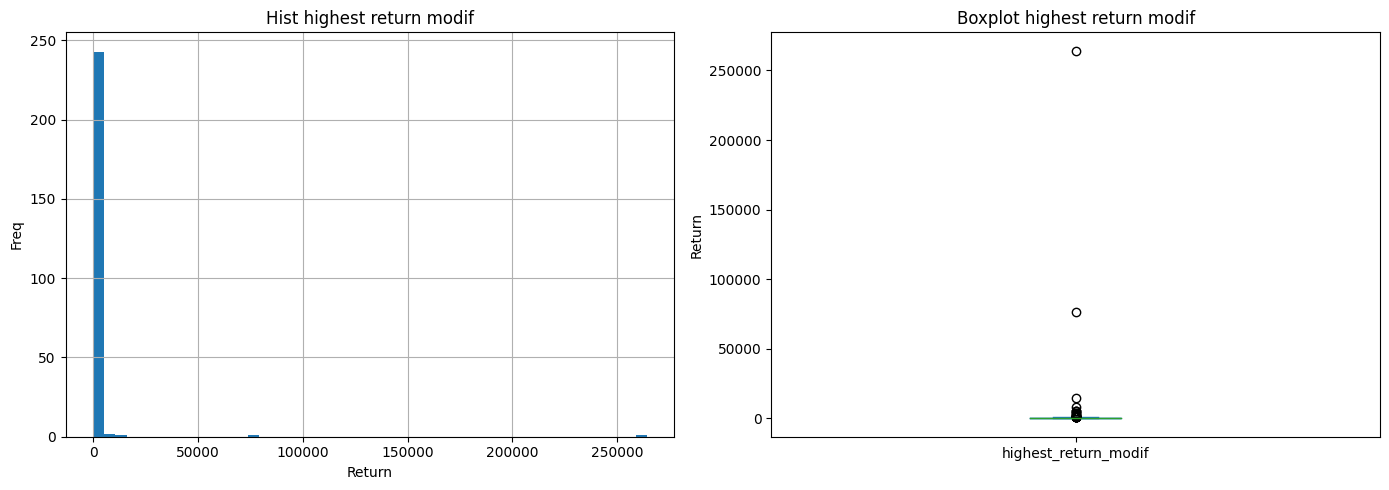

In [353]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df["highest_return_modif"].hist(bins=50, ax=ax[0])
df["highest_return_modif"].plot.box(ax=ax[1])
ax[0].set_title("Hist highest return modif")
ax[0].set_xlabel("Return")
ax[0].set_ylabel("Freq")
ax[1].set_title("Boxplot highest return modif")
ax[1].set_ylabel("Return");
plt.tight_layout()

In [354]:
df.sort_values(by="highest_return_modif", ascending=False).head()

,ticker,ref_report_date,report_date,ref_report_date_quarter,report_date_quarter,outs_shares1,outs_shares2,outs_shares3,outs_shares4,outs_shares5,outs_shares6,outs_shares7,outs_shares8,outs_shares9,outs_shares10,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y,min_price_date,min_price,max_price_date,max_price,ncavps,liqvps,ncav_mos,liqv_mos,highest_return_delay,doubling_price,doubling_date,doubling_return_delay,highest_return,min_price_modif,max_price_modif,ncav_mos_modif,liqv_mos_modif,doubling_price_modif,highest_return_modif,ticker_type
341,TLRS,2009-08-12,2018-08-13,Q3,Q3,4.047837e+07,3.191866e+07,16127922.0,12000084.0,6239078.0,5676800.0,5189302.0,5096139.0,3805185.0,2909667.0,-112.57,-46.75,2018-10-18,0.0001,2021-01-08,0.3964,0.003073,0.224527,96.75,99.96,2.23,0.0002,2020-03-17,1.41,396300.00,0.00012,0.31712,96.10,99.95,0.00024,264166.67,listed
328,SYTA,2008-06-30,2017-06-30,Q2,Q2,5.782560e+05,4.779550e+05,61248.0,7203.0,8716.0,8763.0,5191.0,4252.0,3369.0,686.0,-135.05,-89.35,2017-09-27,0.4717,2020-09-25,540.0000,10.735835,5.021484,95.61,90.61,3.00,0.9434,2020-09-25,3.00,114379.54,0.56604,432.00000,94.73,88.73,1.13208,76219.69,listed
343,TMNA,2015-10-20,2022-11-14,Q3,Q3,1.227516e+09,1.051385e+09,993000000.0,40197751.0,40197751.0,37500000.0,25747500.0,25747500.0,NaN,NaN,-122.76,-40.75,2022-10-07,0.0100,2022-10-10,2.1500,0.022839,0.443518,56.22,97.75,0.01,0.0200,2023-07-03,0.74,21400.00,0.01200,1.72000,47.46,97.29,0.02400,14233.33,listed
71,BWMG,2009-05-13,2018-05-21,Q1,Q1,1.021347e+08,1.059129e+08,92368596.0,67303690.0,7196169.0,941986.0,42661.0,3207.0,1336.0,1323.0,-125.67,-132.00,2018-06-18,0.0007,2021-04-12,0.0870,0.001034,-0.004048,32.30,117.29,2.82,0.0014,2019-02-28,0.70,12328.57,0.00084,0.06960,18.76,120.75,0.00168,8185.71,listed
303,SILC,1999-06-30,2008-07-02,Q2,Q2,6.770000e+06,6.328000e+06,5418000.0,4397000.0,4199000.0,4110000.0,4123077.0,4121000.0,4389000.0,3985000.0,-41.58,0.15,2008-09-29,0.2665,2011-04-21,21.9100,2.740768,1.430158,90.28,81.37,2.56,0.5330,2008-10-10,0.03,8121.39,0.31980,17.52800,88.33,77.64,0.63960,5380.93,listed


Theoretically we could get a 1300% average return on the companies with a ncav > market price. With a highest of 264166% (coherent with tradingview values) and a lowest of -28%

In [355]:
# Let's get rid of the outliers
q1 = np.quantile(df["highest_return_modif"], 0.25)
q3 = np.quantile(df["highest_return_modif"], 0.75)
iqr = q3 - q1
df_wo_outliers = df.copy()
df_wo_outliers = df_wo_outliers[(df_wo_outliers["highest_return_modif"] >= q1 - 1.5*iqr) & (df_wo_outliers["highest_return_modif"] <= q3 + 1.5*iqr)]

In [356]:
df_wo_outliers["highest_return_modif"].describe()

count    221.000000
mean     164.117647
std      155.335372
min      -25.400000
25%       49.890000
50%      111.620000
75%      225.250000
max      700.000000
Name: highest_return_modif, dtype: float64

* When getting rid of the outliers only the crazy positive returns are discarded (the losses are kept).
* We observe an average return of 164% with a max of 700% and a low of -25%.
* Note that the 50% of the samples have a return smaller than 111%

### How many companies we invested on more than once

In [357]:
df_wo_outliers.loc[df_wo_outliers.duplicated(subset=["ticker"]), "ticker"]

Series([], Name: ticker, dtype: object)

In [358]:
df.loc[df.duplicated(subset=["ticker"]), "ticker"]

Series([], Name: ticker, dtype: object)

There are companies that appear as listed and delisted. We will get rid of the "listed" ones from this subset

In [359]:
print(df.shape)
df = df.drop_duplicates(subset=[col for col in df.columns if "ticker_type" not in col], keep="last")
print(df.shape)

(248, 37)
(248, 37)


In [360]:
df.loc[df.duplicated(subset=["ticker"]), "ticker"]

Series([], Name: ticker, dtype: object)

No companies appeared more than once

In [361]:
df["highest_return_modif"].describe()

count       248.000000
mean       1799.611008
std       17451.113068
min         -25.400000
25%          60.985000
50%         128.895000
75%         319.802500
max      264166.670000
Name: highest_return_modif, dtype: float64

In [362]:
# Let's get rid of the outliers
q1 = np.quantile(df["highest_return_modif"], 0.25)
q3 = np.quantile(df["highest_return_modif"], 0.75)
iqr = q3 - q1
df_wo_outliers = df.copy()
df_wo_outliers = df_wo_outliers[(df_wo_outliers["highest_return_modif"] >= q1 - 1.5*iqr) & (df_wo_outliers["highest_return_modif"] <= q3 + 1.5*iqr)]

In [363]:
df_wo_outliers["highest_return_modif"].describe()

count    221.000000
mean     164.117647
std      155.335372
min      -25.400000
25%       49.890000
50%      111.620000
75%      225.250000
max      700.000000
Name: highest_return_modif, dtype: float64

### stats on 10y slope and 5y slope

In [364]:
df_wo_outliers[["outs_shares_slope_pct_10y", "outs_shares_slope_pct_5y"]].describe()

,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y
count,221.000000,220.000000
mean,-56.939955,131.306136
std,306.823748,2217.279424
min,-3218.820000,-1002.770000
25%,-68.930000,-47.692500
50%,-25.140000,-11.960000
75%,-1.460000,-0.650000
max,1663.640000,32789.930000


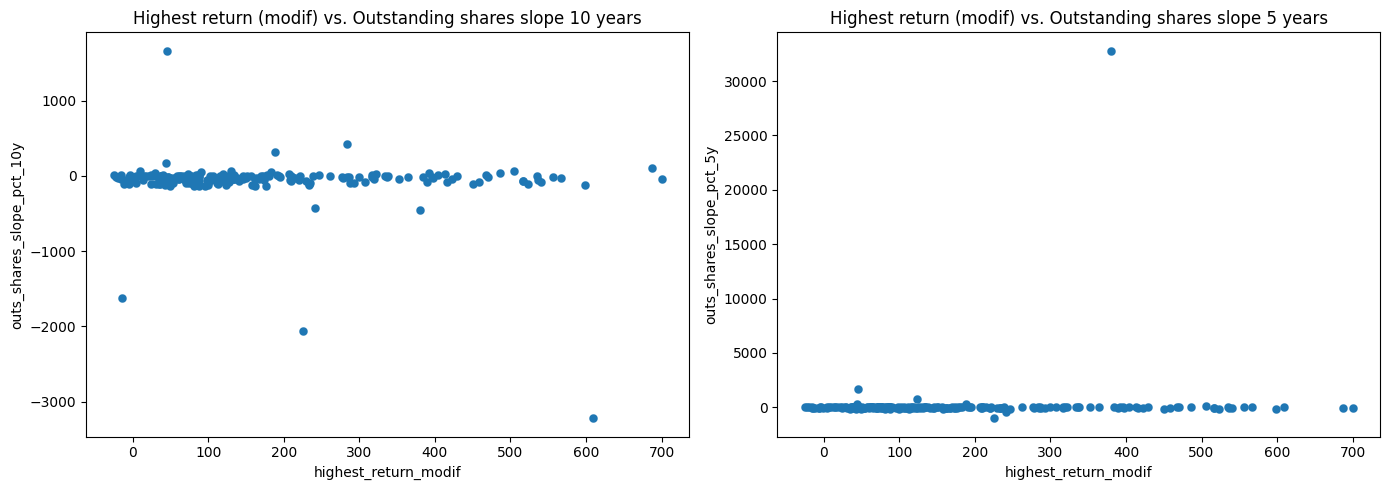

In [365]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].scatter(df_wo_outliers["highest_return_modif"], df_wo_outliers["outs_shares_slope_pct_10y"], linewidths=0.1)
ax[0].set_xlabel("highest_return_modif")
ax[0].set_ylabel("outs_shares_slope_pct_10y")
ax[0].set_title("Highest return (modif) vs. Outstanding shares slope 10 years");

ax[1].scatter(df_wo_outliers["highest_return_modif"], df_wo_outliers["outs_shares_slope_pct_5y"], linewidths=0.1)
ax[1].set_xlabel("highest_return_modif")
ax[1].set_ylabel("outs_shares_slope_pct_5y")
ax[1].set_title("Highest return (modif) vs. Outstanding shares slope 5 years");

plt.tight_layout()

In [366]:
df_wo_outliers.loc[df["highest_return_modif"] < 0, "outs_shares_slope_pct_10y"].describe(),  \
df_wo_outliers.loc[df["highest_return_modif"] >= 0, "outs_shares_slope_pct_10y"].describe()

(count      13.000000
 mean     -158.192308
 std       443.016824
 min     -1626.930000
 25%       -48.580000
 50%       -37.760000
 75%       -17.950000
 max        14.310000
 Name: outs_shares_slope_pct_10y, dtype: float64,
 count     208.000000
 mean      -50.611683
 std       296.633328
 min     -3218.820000
 25%       -68.992500
 50%       -24.590000
 75%        -1.437500
 max      1663.640000
 Name: outs_shares_slope_pct_10y, dtype: float64)

* Note also that there are a lot of companies with a slope around 0 but still low returns
* On average the companies that provide a positive return have less negative slopes values than those with which we lose money. Probably because of the outliers 

### Number of companies with which we lost money

In [367]:
df_wo_outliers[df_wo_outliers["highest_return_modif"] < 0].shape, df_wo_outliers.shape

((13, 37), (221, 37))

We lost money with 13 out of 221 companies. That is 6% of the companies we put our money in

### how much we lost in average with the losing companies

In [368]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 0, "highest_return_modif"].describe()

count    13.000000
mean    -11.813846
std       7.823340
min     -25.400000
25%     -16.000000
50%     -12.160000
75%      -5.280000
max      -0.900000
Name: highest_return_modif, dtype: float64

Around 12%, with a max of 25% loss

### mos of winning and losing companies

In [369]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 0, "ncav_mos"].describe(), df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 0 , "ncav_mos"].describe()

(count    13.000000
 mean     33.946154
 std      40.272155
 min       0.310000
 25%       5.250000
 50%       9.490000
 75%      77.620000
 max      99.730000
 Name: ncav_mos, dtype: float64,
 count    208.000000
 mean      33.124808
 std       26.286937
 min        0.240000
 25%       11.240000
 50%       28.065000
 75%       50.817500
 max       99.780000
 Name: ncav_mos, dtype: float64)

In [370]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 0, "liqv_mos"].describe(), df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 0 , "liqv_mos"].describe()

(count     13.000000
 mean      47.124615
 std      173.910013
 min     -130.540000
 25%      -37.920000
 50%       -3.560000
 75%       70.810000
 max      571.970000
 Name: liqv_mos, dtype: float64,
 count     208.000000
 mean       27.189038
 std       380.752384
 min     -2636.050000
 25%       -29.907500
 50%        10.130000
 75%        52.482500
 max      2505.420000
 Name: liqv_mos, dtype: float64)

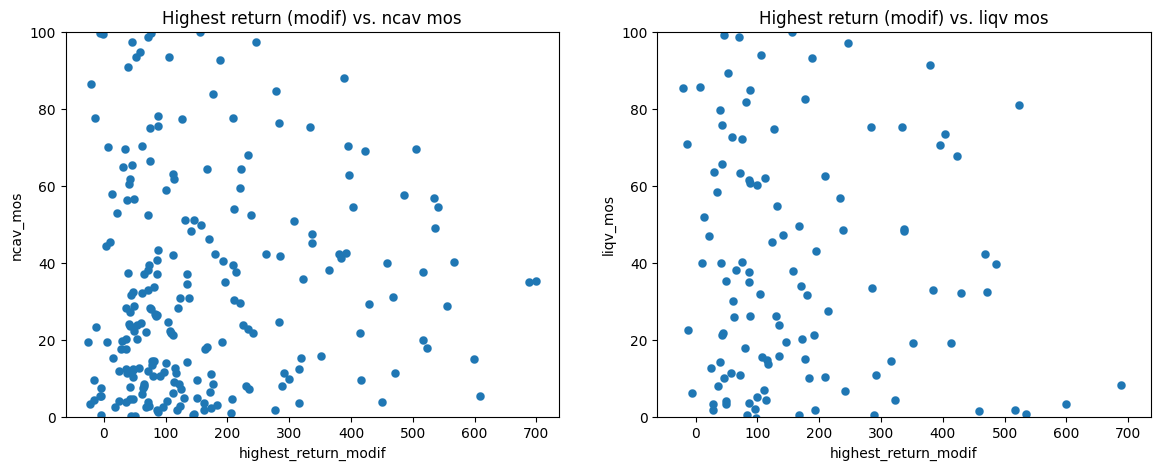

In [371]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].scatter(df_wo_outliers["highest_return_modif"], df_wo_outliers["ncav_mos"], linewidths=0.1)
ax[0].set_xlabel("highest_return_modif")
ax[0].set_ylabel("ncav_mos")
ax[0].set_title("Highest return (modif) vs. ncav mos");
ax[0].set_ylim(0, 100)

ax[1].scatter(df_wo_outliers["highest_return_modif"], df_wo_outliers["liqv_mos"], linewidths=0.1)
ax[1].set_xlabel("highest_return_modif")
ax[1].set_ylabel("liqv_mos")
ax[1].set_title("Highest return (modif) vs. liqv mos")
ax[1].set_ylim(0, 100);

- It does not seem like to mos of safety (ncav or liqv) are, by themselves, proxies of how good the return is going to be

### how many lines give 100% return vs how many do not

In [372]:
not100 = df_wo_outliers[pd.isna(df_wo_outliers["doubling_return_delay"])].shape[0]
print("Number of companies not giving 100% return: ", not100)
print(f"representing {round(100 * not100 / len(df_wo_outliers), 2)}")

Number of companies not giving 100% return:  26
representing 11.76


In [373]:
yes100 = df_wo_outliers[~pd.isna(df_wo_outliers["doubling_return_delay"])].shape[0]
print("Number of companies not giving 100% return: ", yes100)
print(f"representing {round(100 * yes100 / len(df_wo_outliers), 2)}")

Number of companies not giving 100% return:  195
representing 88.24


In [374]:
df_wo_outliers.loc[pd.isna(df_wo_outliers["doubling_return_delay"]), "highest_return_modif"].describe()

count    26.000000
mean      2.851923
std      17.199705
min     -25.400000
25%     -10.722500
50%       1.425000
75%      17.257500
max      30.430000
Name: highest_return_modif, dtype: float64

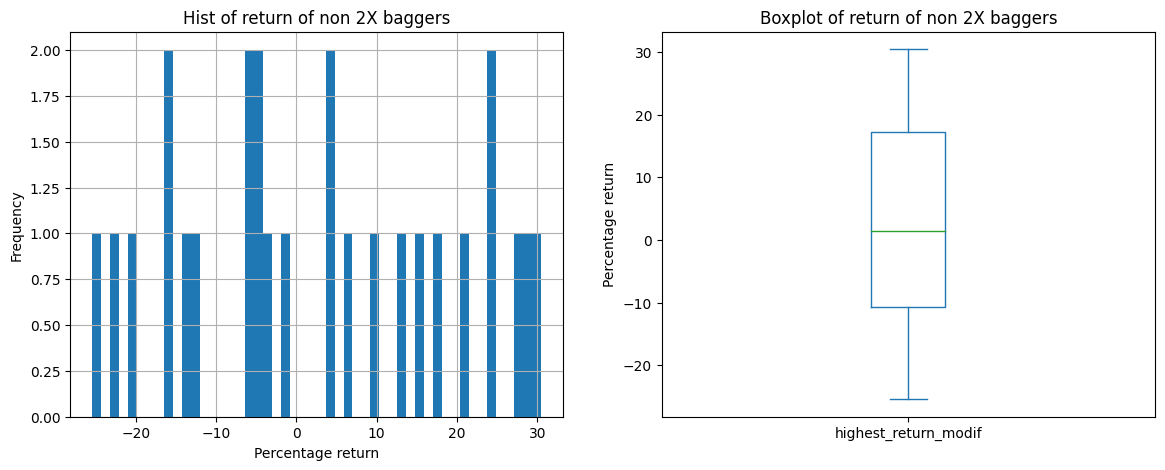

In [375]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[pd.isna(df_wo_outliers["doubling_return_delay"]), "highest_return_modif"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[pd.isna(df_wo_outliers["doubling_return_delay"]), "highest_return_modif"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return of non 2X baggers")
ax[0].set_xlabel("Percentage return")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return of non 2X baggers")
ax[1].set_ylabel("Percentage return");

In [376]:
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "highest_return_modif"].describe()

count    195.000000
mean     185.619744
std      152.887543
min       34.650000
25%       71.385000
50%      127.370000
75%      243.750000
max      700.000000
Name: highest_return_modif, dtype: float64

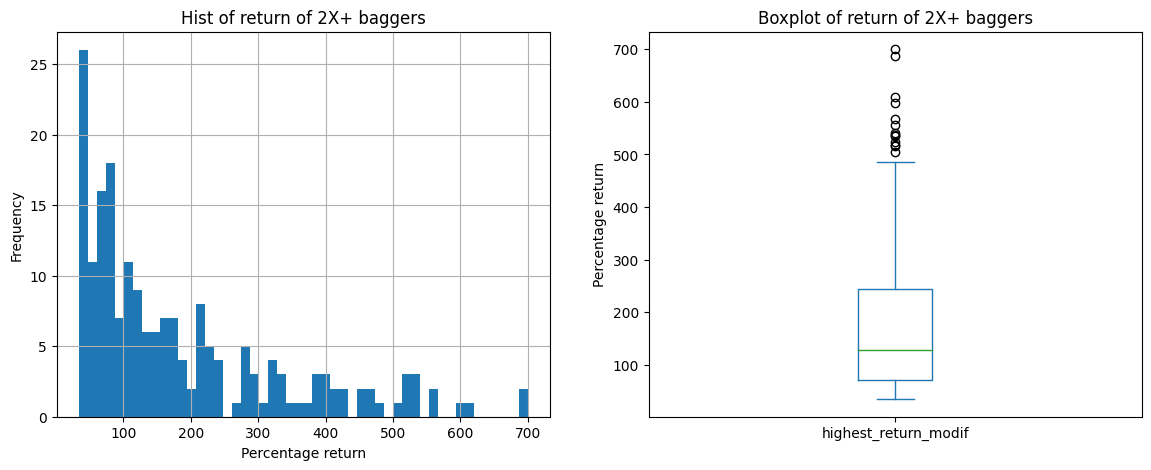

In [377]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "highest_return_modif"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "highest_return_modif"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return of 2X+ baggers")
ax[0].set_xlabel("Percentage return")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return of 2X+ baggers")
ax[1].set_ylabel("Percentage return");

- 12% of the companies from the database do not provide more than 100% return. These companies provide an average return of 2% with a min of 25% and a max of 30%
- 88% of the companies from the database  provide more than 100% return. These companies provide an average return of 185% with a min of 35% and a max of 700% 

### how long does it take in average to double bag

In [378]:
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "doubling_return_delay"].describe()

count    195.000000
mean       1.057590
std        0.919503
min        0.000000
25%        0.275000
50%        0.750000
75%        1.790000
max        2.990000
Name: doubling_return_delay, dtype: float64

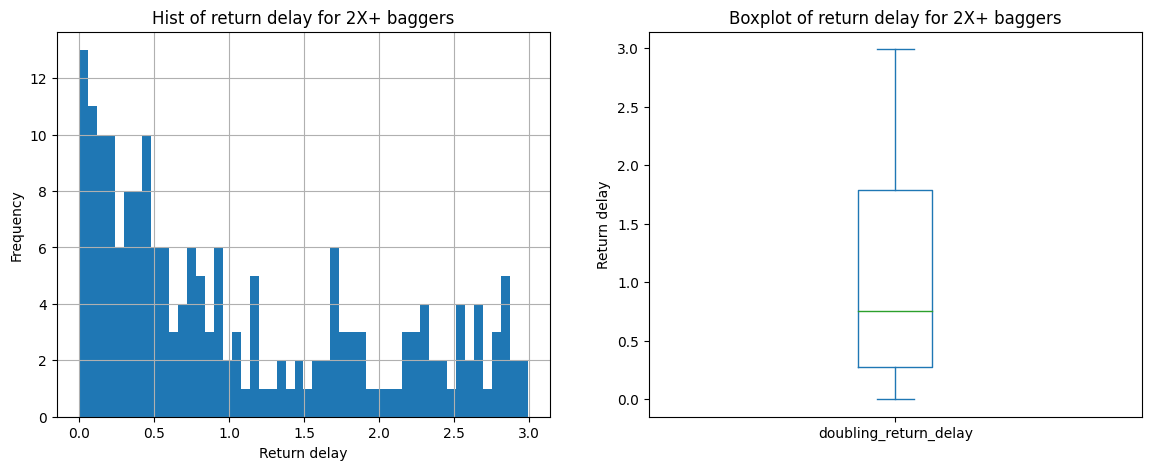

In [379]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "doubling_return_delay"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "doubling_return_delay"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return delay for 2X+ baggers")
ax[0].set_xlabel("Return delay")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return delay for 2X+ baggers")
ax[1].set_ylabel("Return delay");

* On average the money is doubled in a bit more than a year.
* We can see that the majority of the 2X happends in less than 1.5 years
* The return can wait all the way to 3 years (We limit to three years the investment period on a single company)

### how long does it take to make the highest return modif on the winning ones

In [380]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] > 0, "highest_return_delay"].describe()

count    208.000000
mean       1.217019
std        1.008391
min        0.000000
25%        0.270000
50%        0.880000
75%        2.202500
max        3.000000
Name: highest_return_delay, dtype: float64

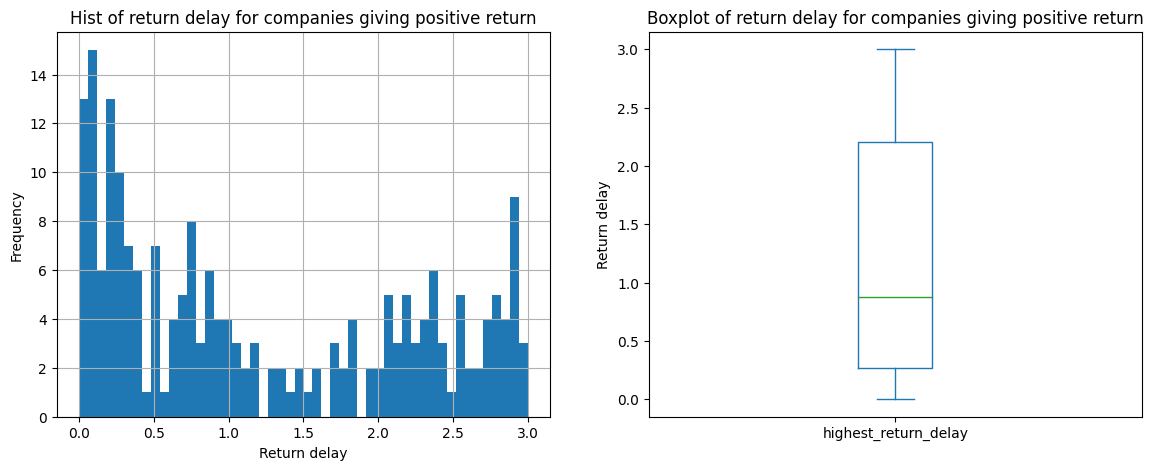

In [381]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] > 0, "highest_return_delay"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] > 0, "highest_return_delay"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return delay for companies giving positive return")
ax[0].set_xlabel("Return delay")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return delay for companies giving positive return")
ax[1].set_ylabel("Return delay");

* Similar values than for the doubling 
* Values are just slightly higher (1.05 vs. 1.2 years for return average)

### Basic statistical model

In [477]:
df.columns

Index(['ticker', 'ref_report_date', 'report_date', 'ref_report_date_quarter',
       'report_date_quarter', 'outs_shares1', 'outs_shares2', 'outs_shares3',
       'outs_shares4', 'outs_shares5', 'outs_shares6', 'outs_shares7',
       'outs_shares8', 'outs_shares9', 'outs_shares10',
       'outs_shares_slope_pct_10y', 'outs_shares_slope_pct_5y',
       'min_price_date', 'min_price', 'max_price_date', 'max_price', 'ncavps',
       'liqvps', 'ncav_mos', 'liqv_mos', 'highest_return_delay',
       'doubling_price', 'doubling_date', 'doubling_return_delay',
       'highest_return', 'min_price_modif', 'max_price_modif',
       'ncav_mos_modif', 'liqv_mos_modif', 'doubling_price_modif',
       'highest_return_modif', 'ticker_type'],
      dtype='object')

In [480]:
numeric_cols = [col for col in df.columns if df[col].dtype in (int, float) and "outs_shares" not in col]
numeric_cols = numeric_cols + ["outs_shares_slope_pct_10y", "outs_shares_slope_pct_5y"]

In [483]:
numeric_cols

['min_price',
 'max_price',
 'ncavps',
 'liqvps',
 'ncav_mos',
 'liqv_mos',
 'highest_return_delay',
 'doubling_price',
 'doubling_return_delay',
 'highest_return',
 'min_price_modif',
 'max_price_modif',
 'ncav_mos_modif',
 'liqv_mos_modif',
 'doubling_price_modif',
 'highest_return_modif',
 'outs_shares_slope_pct_10y',
 'outs_shares_slope_pct_5y']

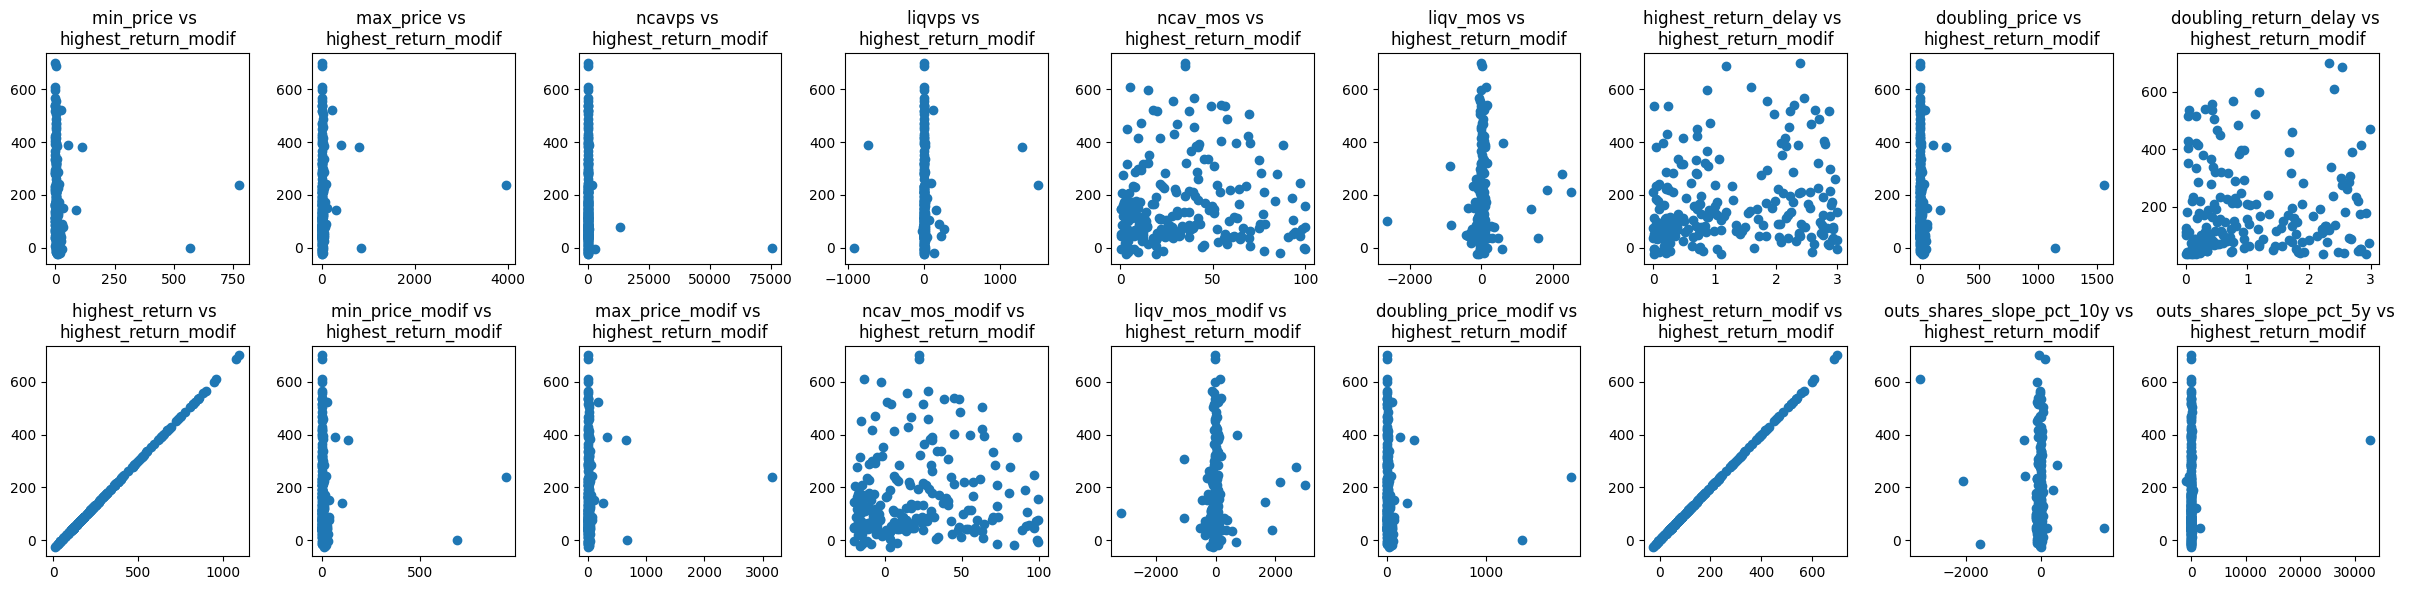

In [484]:
fig, ax = plt.subplots(2, len(numeric_cols) // 2 + len(numeric_cols) % 2, figsize=(24, 6))
for idx, col in enumerate(numeric_cols):
    idx0, idx1 = (
        idx // (len(numeric_cols) // 2),
        idx % (len(numeric_cols) // 2 + len(numeric_cols) % 2)
    )
    ax[idx0, idx1].scatter(df_wo_outliers[col], df_wo_outliers["highest_return_modif"])
    ax[idx0, idx1].set_title(f"{col} vs \nhighest_return_modif")
plt.tight_layout()

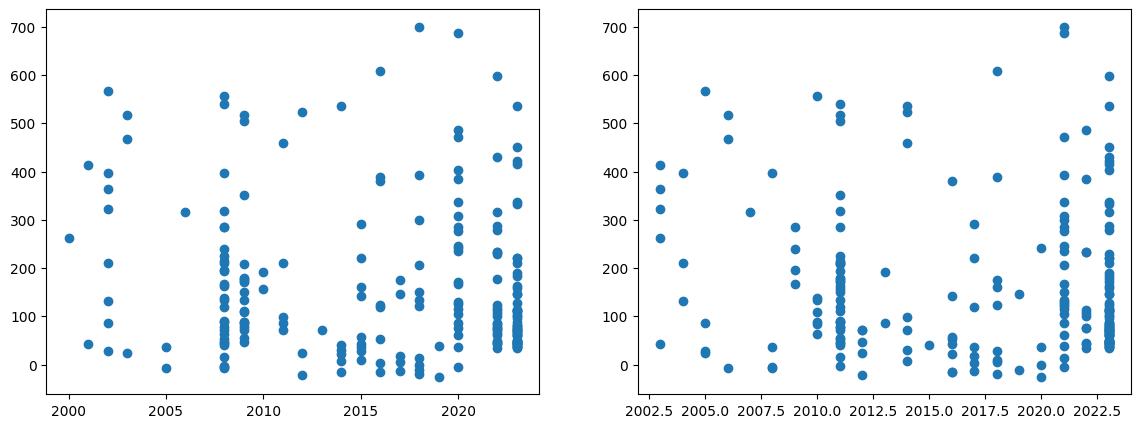

In [485]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].scatter(df_wo_outliers["min_price_date"].apply(lambda x: x.year), df_wo_outliers["highest_return_modif"])
ax[1].scatter(df_wo_outliers["max_price_date"].apply(lambda x: x.year), df_wo_outliers["highest_return_modif"])

* This vision per year is quite sparse

### Dummy classif task

In [486]:
df_wo_outliers["label"] = df_wo_outliers["highest_return_modif"] > 80

In [487]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [488]:
data = df_wo_outliers.copy()
data = data.dropna()
X = data[numeric_cols].copy()
X = X.drop(columns=["highest_return_modif", "highest_return", "max_price", "max_price_modif", "highest_return_delay", "doubling_return_delay"], axis=1)
y = data["label"].copy()
del data

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [498]:
rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=4, random_state=42)

In [499]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=300, random_state=42)

In [500]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [501]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

       False       1.00      0.75      0.86        28
        True       0.92      1.00      0.96        77

    accuracy                           0.93       105
   macro avg       0.96      0.88      0.91       105
weighted avg       0.94      0.93      0.93       105



In [502]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.20      0.33         5
        True       0.78      1.00      0.88        14

    accuracy                           0.79        19
   macro avg       0.89      0.60      0.60        19
weighted avg       0.84      0.79      0.73        19



In [503]:
feats = dict(zip(rf.feature_names_in_, rf.feature_importances_))

In [504]:
feats = dict(sorted(feats.items(), key=lambda x: x[1], reverse=False))

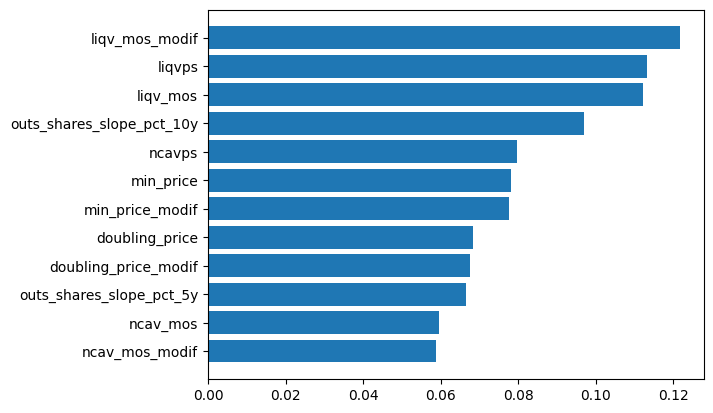

In [505]:
plt.barh(y=list(feats.keys()), width=list(feats.values()));

For now it seems like diversification is the most important thing to consider. More analysis should be carried out

### Average return for a specific case

I consider the companies with a mos os at least 33% and not diluting shares significantly (slope < 20%). What would be the average return in that case

In [511]:
df_wo_outliers.loc[(df_wo_outliers["ncav_mos"] > 33) & (df_wo_outliers["outs_shares_slope_pct_10y"] < 20), "highest_return_modif"].describe()

count     83.000000
mean     186.152169
std      161.604564
min      -20.000000
25%       68.205000
50%      134.230000
75%      270.225000
max      700.000000
Name: highest_return_modif, dtype: float64

In [513]:
df_wo_outliers.loc[(df_wo_outliers["ncav_mos"] > 33) & (df_wo_outliers["outs_shares_slope_pct_10y"] < 20) & (df_wo_outliers["highest_return_modif"] < 0), "highest_return_modif"].shape, \
df_wo_outliers.loc[(df_wo_outliers["ncav_mos"] > 33) & (df_wo_outliers["outs_shares_slope_pct_10y"] < 20) & (df_wo_outliers["highest_return_modif"] > 0), "highest_return_modif"].shape

((4,), (79,))

If we focus on the companies that have a mos > 33% and not diluting many shares we have:
* an average return of 186% with a min of 20% and a max of 700
* 4 losing investments and 79 winning investments

### Simple total return model

In [642]:
df_wo_outliers["min_price_date"].apply(lambda x: x.year).value_counts()

min_price_date
2023    53
2008    30
2022    27
2020    23
2009    19
2018    11
2015     9
2016     8
2002     8
2014     6
2017     5
2011     5
2012     3
2003     3
2019     2
2005     2
2010     2
2001     2
2013     1
2000     1
2006     1
Name: count, dtype: int64

I have an initial capital of 10000€ and I want to know how much a have at the end of the period.

For each investment I will put 1k€

In [584]:
buynsell_info = pd.concat([df_wo_outliers[["ticker", "min_price_date"]], df_wo_outliers[["ticker", "max_price_date", "highest_return_modif"]]], axis=0)
buynsell_info = buynsell_info.reset_index(drop=True)
buynsell_info["flag"] = "buy"
buynsell_info.loc[pd.isna(buynsell_info["min_price_date"]), "flag"] = "sell"

In [585]:
buynsell_info["all_dates"] = None
buynsell_info.loc[~pd.isna(buynsell_info["min_price_date"]), "all_dates"] = buynsell_info["min_price_date"]
buynsell_info.loc[~pd.isna(buynsell_info["max_price_date"]), "all_dates"] = buynsell_info["max_price_date"]

In [586]:
buynsell_info = buynsell_info.sort_values(by=["all_dates", "flag"], ascending=True)

In [637]:
solde = 10000
starting_solde = solde
buying_amount = 1000
invest_hash = {}
if buynsell_info.loc[0, "flag"] == "sell":
    print("The row having the oldest date must have a buy flag")
for idx, row in buynsell_info.iterrows():
    if row["flag"] == "buy":
        if solde > 0:
            if row["ticker"] not in invest_hash:
                invest_hash[row["ticker"]] = min(buying_amount, solde)
                solde -= min(buying_amount, solde)
        else:
            continue
    if row["flag"] == "sell":
        if row["ticker"] in invest_hash:
            amount = invest_hash.pop(row["ticker"])
        solde += amount * (row["highest_return_modif"] / 100)

In [638]:
solde

158741.72432

In [639]:
str(buynsell_info.iloc[0]["all_dates"].date()), str(buynsell_info.iloc[len(buynsell_info) - 1]["all_dates"].date())

('2000-05-31', '2023-11-01')

In [640]:
(solde - starting_solde) * 100 / starting_solde

1487.4172432

In [641]:
cagr = ((solde/starting_solde)**(1/23) - 1) * 100
cagr

12.772695368876885

With 10k€ on May 31st 2000 we would have 158k€ on November 1st 2023. For a CAGR of 12.7%